In [1]:
import pm4py

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from overview_viz import vis_queue
from hmmlearn import hmm
import queue_stats

from queue_model import Queue
from queue_adapter import derive_from_dfg
import importer
from importer import do_log
from pivots import *
from queue_stats import *
import viz
import util
import scipy.stats

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 9]

%load_ext autoreload
%aimport queue_model
%aimport queue_adapter
%aimport queue_stats
%aimport overview_viz
%aimport importer
%aimport viz
%aimport util
%aimport pivots
%autoreload 1

%config InlineBackend.figure_format = 'retina'


Bad key "text.kerning_factor" on line 4 in
C:\Users\Daniel\anaconda3\envs\WebMiningAssignments\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
sns.set()

apm
apm 	cases: 9461
trace attributes
{'Spend area text': 'Packaging', 'Company': 'companyID_0000', 'Document Type': 'Standard PO', 'Sub spend area text': 'Labels', 'Purchasing Document': '4507035816', 'Purch. Doc. Category name': 'Purchase order', 'Vendor': 'vendorID_0182', 'Item Type': 'Standard', 'Item Category': '3-way match, invoice before GR', 'Spend classification text': 'PR', 'Source': 'sourceSystemID_0000', 'Name': 'vendor_0180', 'GR-Based Inv. Verif.': False, 'Item': '00180', 'concept:name': '4507035816_00180', 'Goods Receipt': True}
event attributes
{'User': 'user_178', 'org:resource': 'user_178', 'concept:name': 'Create Purchase Order Item', 'time:timestamp': datetime.datetime(2018, 6, 12, 9, 51, tzinfo=tzoffset(None, 7200)), 'Cumulative net worth (EUR)': 215.0}
0.5396892506077582 Create Purchase Order Item,Vendor creates invoice,Record Goods Receipt,Record Invoice Receipt,Clear Invoice
0.32892928865870413 Create Purchase Order Item,Record Goods Receipt,Vendor creates invoi

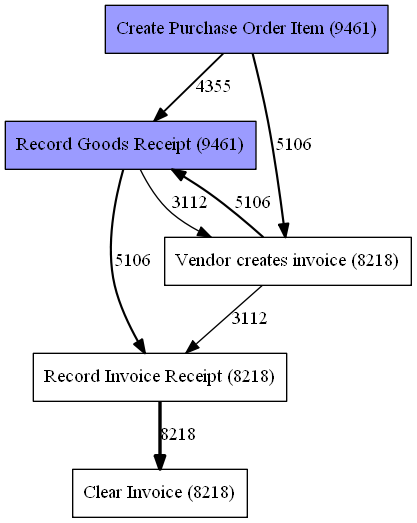

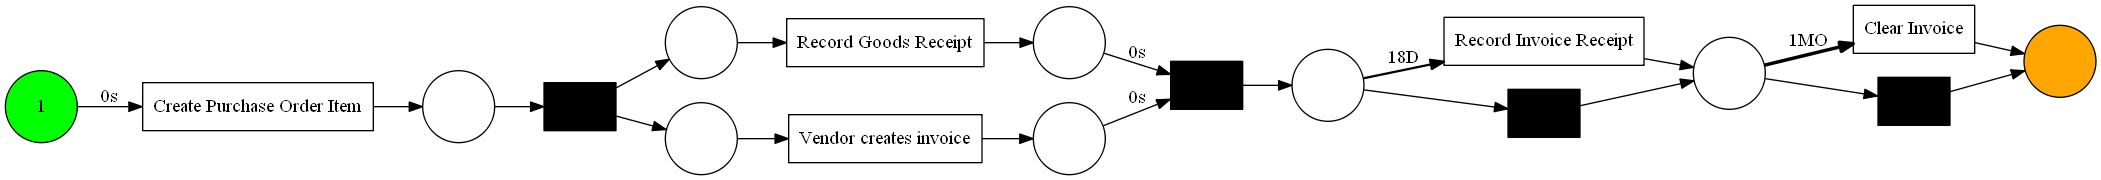

C:\Users\Daniel\anaconda3\envs\WebMiningAssignments\lib\site-packages\pm4py\algo\conformance\alignments\versions\state_equation_a_star.py:260: DeprecationWarning: Call to deprecated function import_petri_from_string.
  petri_net, initial_marking, final_marking = petri_importer.import_petri_from_string(petri_net_string)
C:\Users\Daniel\anaconda3\envs\WebMiningAssignments\lib\site-packages\pm4py\algo\conformance\alignments\versions\state_equation_a_star.py:260: DeprecationWarning: Call to deprecated function import_petri_from_string.
  petri_net, initial_marking, final_marking = petri_importer.import_petri_from_string(petri_net_string)
C:\Users\Daniel\anaconda3\envs\WebMiningAssignments\lib\site-packages\pm4py\algo\conformance\alignments\versions\state_equation_a_star.py:260: DeprecationWarning: Call to deprecated function import_petri_from_string.
  petri_net, initial_marking, final_marking = petri_importer.import_petri_from_string(petri_net_string)
C:\Users\Daniel\PycharmProjects\pm\qu

In [3]:
log_queues = {}

for log in ['apm']:
    
    print(log)
    queues = do_log(log)
    log_queues[log] = queues
    
    for n, q in queues.items():
        print(n)
        tags = classify_qr(q) + classify_ias(q) + classify_df(q)
        print(tags)

In [4]:
log_queues

{'apm': {'p_4': <queue_model.Queue at 0x232b7b24c48>,
  'p_7': <queue_model.Queue at 0x232b7b24a88>,
  'p_5': <queue_model.Queue at 0x232b7b26088>,
  'p_6': <queue_model.Queue at 0x232b7b26348>,
  'p_8': <queue_model.Queue at 0x2329254d208>,
  'p_3': <queue_model.Queue at 0x232993c2888>,
  'p_9': <queue_model.Queue at 0x232b7b089c8>}}

In [5]:
q = log_queues['apm']['p_9']

In [6]:
q.get_replay().stats

{'queueing events': 18922,
 'interesting exits': 9458,
 'continuous lifo': 0.4650174606151575,
 'dequeue index entropy': 0.32068863514980617,
 'dequeue index pseudo cont entropy': 0.9138672710961148,
 'avg continuous overtaken': 0.4645819904805421,
 'spt': 0.075703108479594,
 'spt cont mean': 0.6814379024468116}

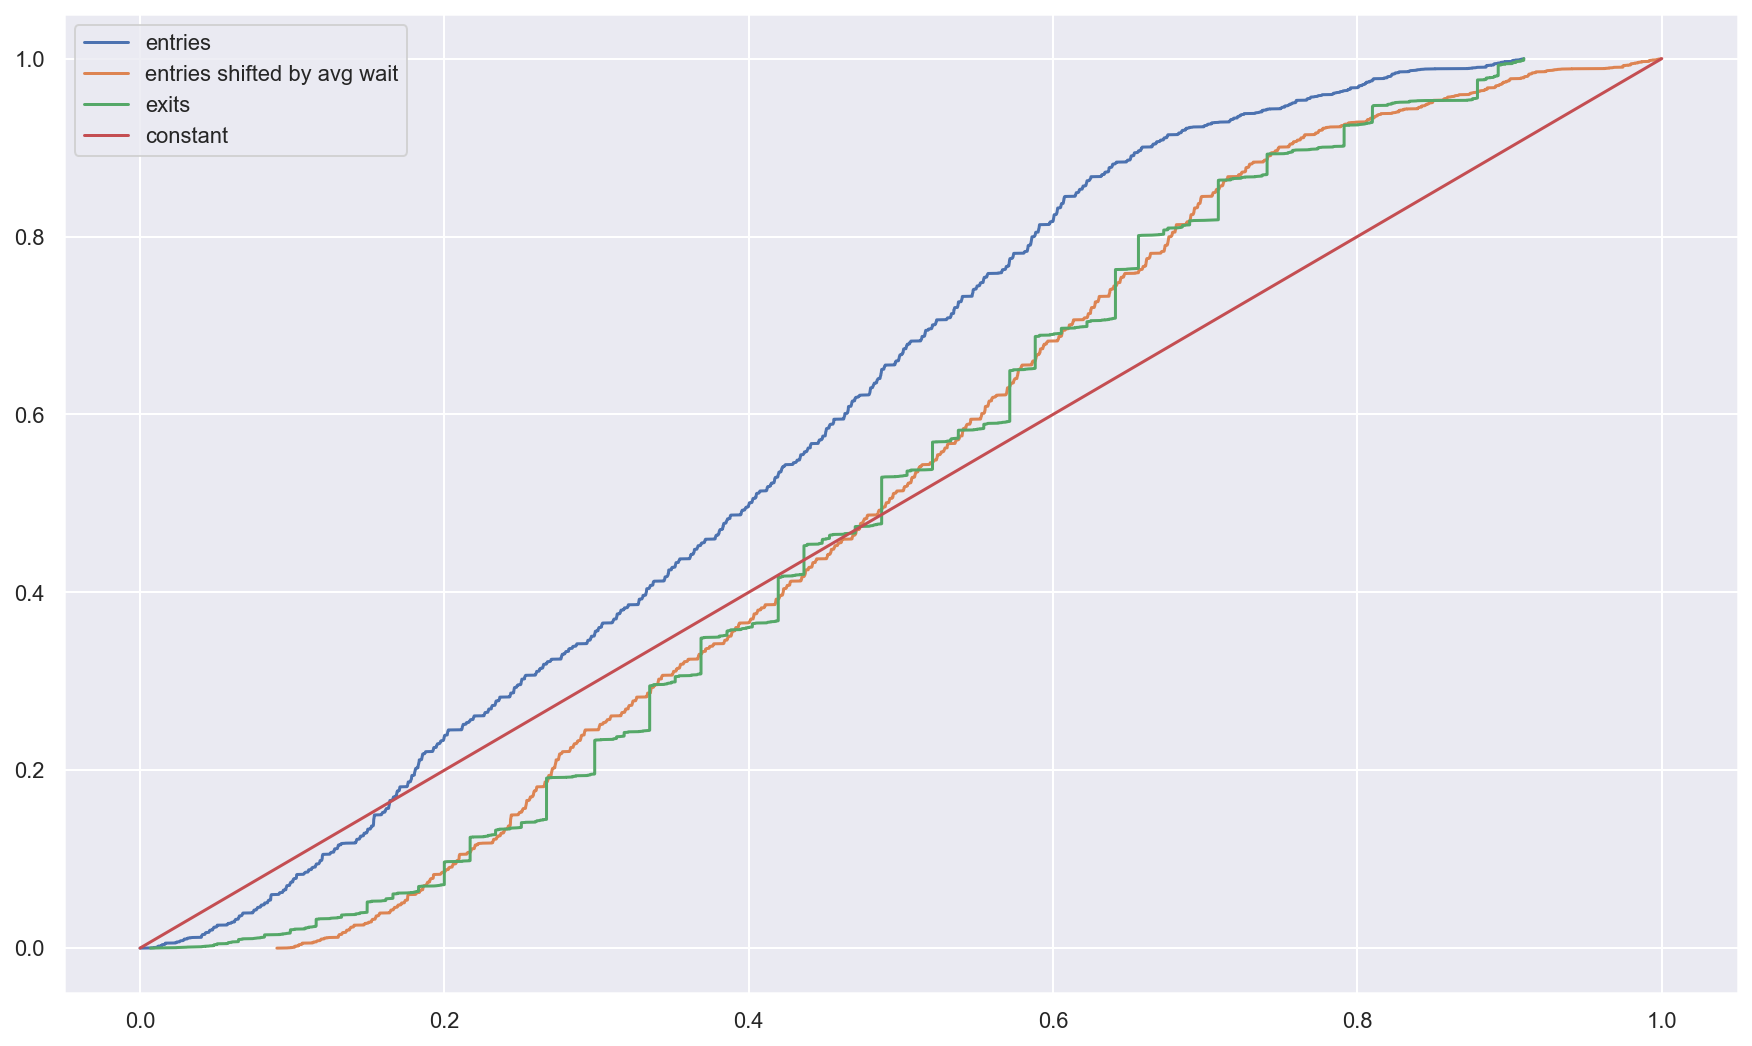

In [7]:
viz.vis_iat_over_time(q)

In [8]:
df = q.get_data()
ias = q.get_interarrivals()
wait_mean = df.wait.mean()
obs_start = q.get_observation_start()
obs_period = max(df.exit.max(), df.entry.max() + wait_mean) - obs_start
normed_exit_count = (ias.exit - obs_start) / obs_period
normed_entry_count = (ias.entry - obs_start) / obs_period
normed_shifted_entry_count = (ias.entry + wait_mean - obs_start) / obs_period
entry_int = scipy.integrate.trapz(np.linspace(0, 1, len(ias)), normed_entry_count)
shifted_entry_int = scipy.integrate.trapz(np.linspace(0, 1, len(ias)), normed_shifted_entry_count)
exit_int = scipy.integrate.trapz(np.linspace(0, 1, len(ias)), normed_exit_count)
entry_int, shifted_entry_int, exit_int

(0.5127862002125158, 0.5127862002125158, 0.42283335591478394)

In [9]:
np.sqrt(np.square(normed_shifted_entry_count - normed_exit_count).sum())

1.750256092461688

{'queueing events': 18922, 'interesting exits': 9458, 'continuous lifo': 0.4650174606151575, 'dequeue index entropy': 0.32068863514980617, 'dequeue index pseudo cont entropy': 0.9138672710961148, 'avg continuous overtaken': 0.4645819904805421, 'spt': 0.075703108479594, 'spt cont mean': 0.6814379024468116}
Ks_2sampResult(statistic=0.1259251427363079, pvalue=9.93443620065985e-66)


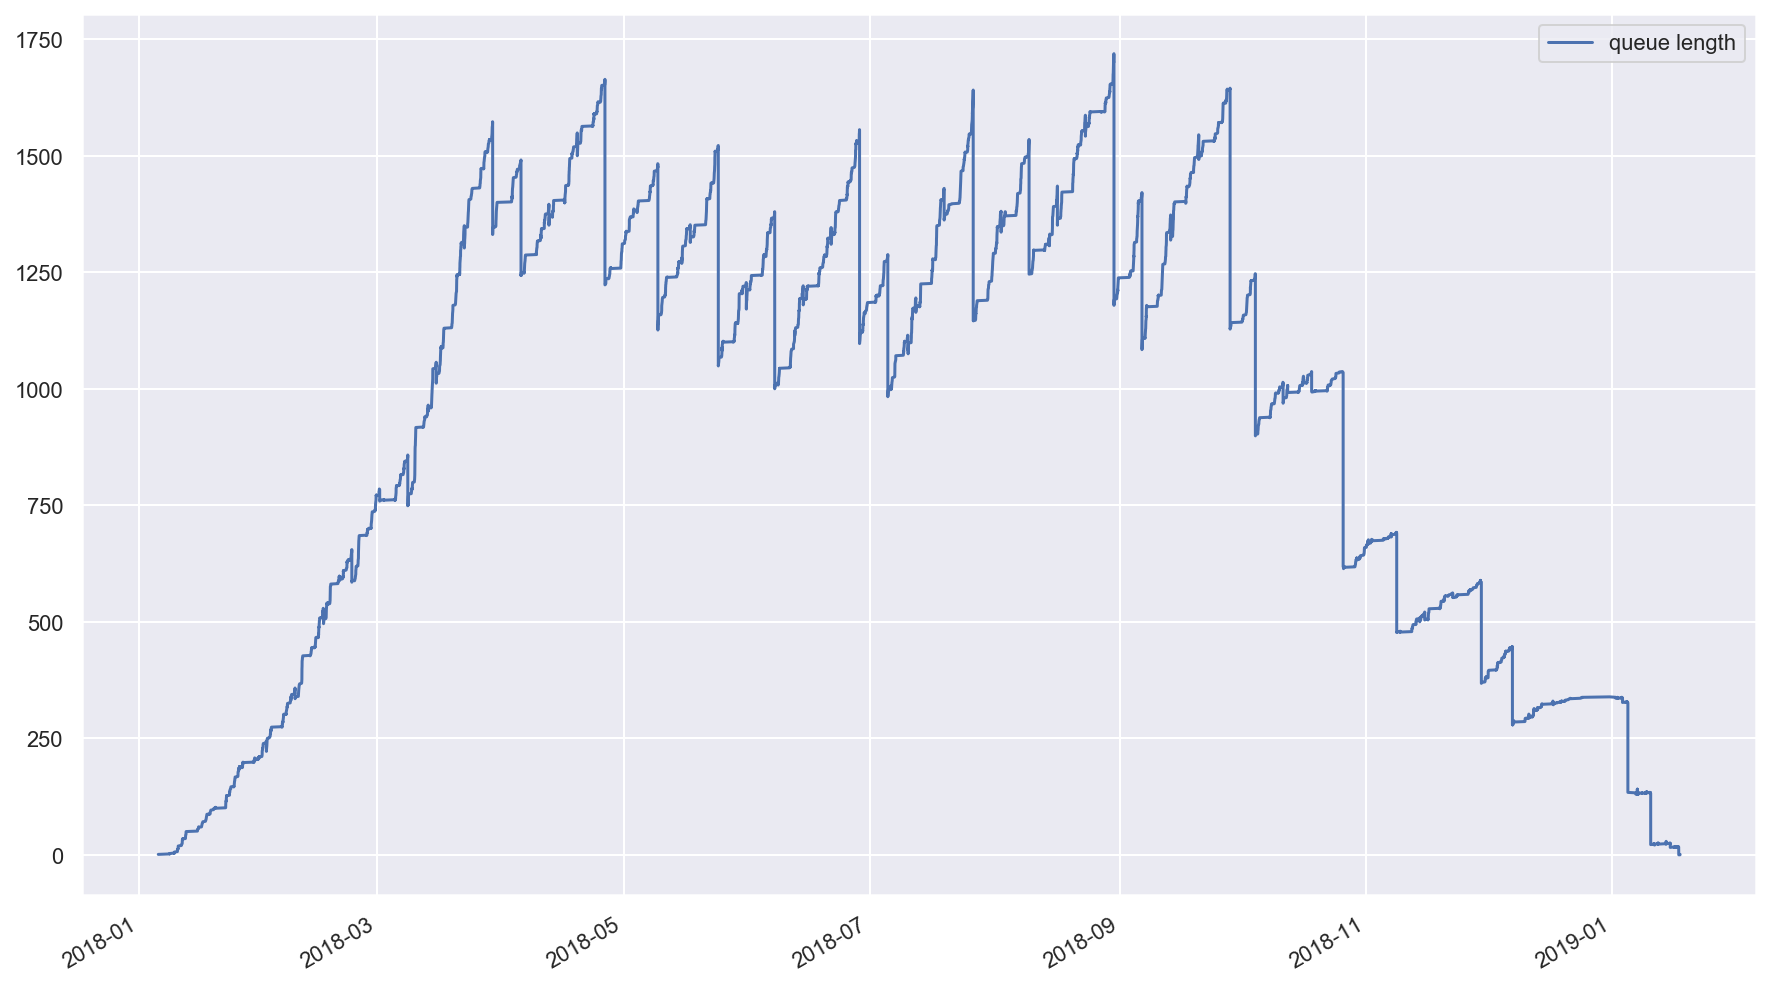

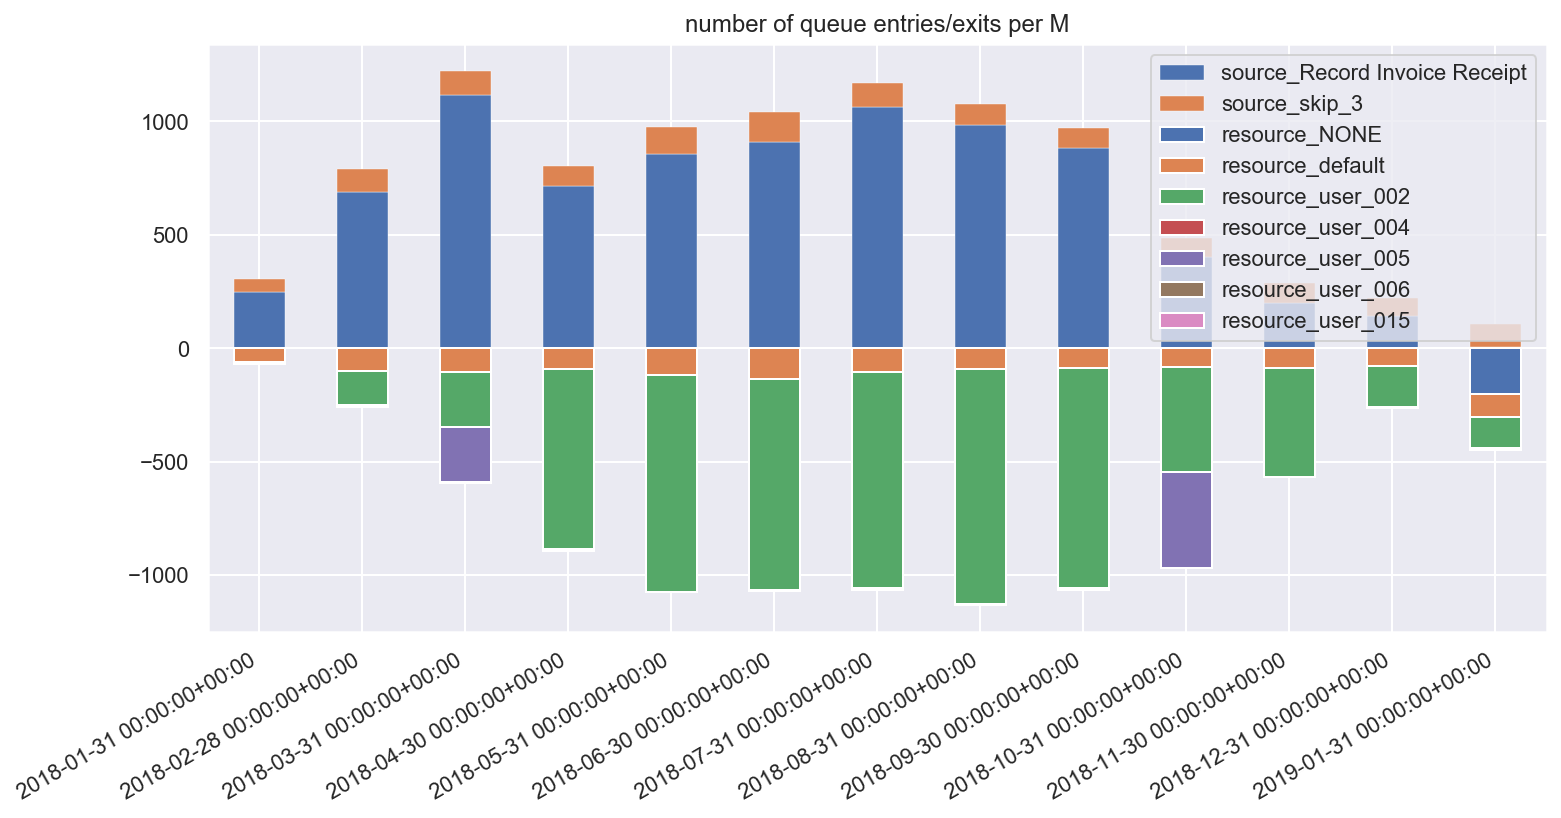

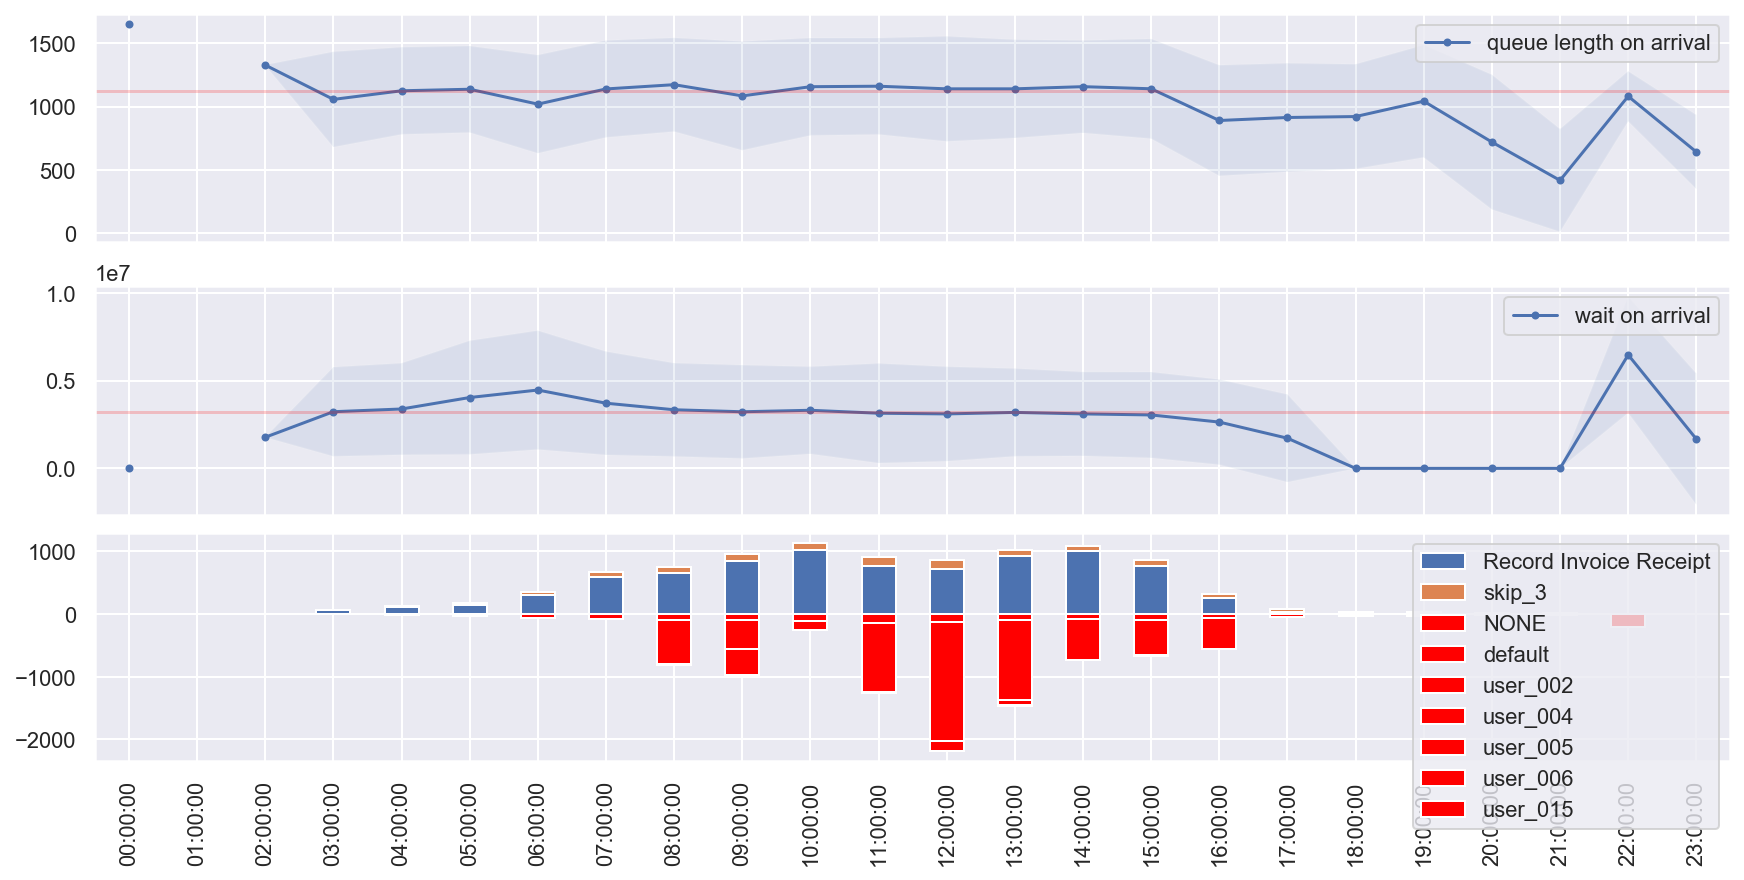

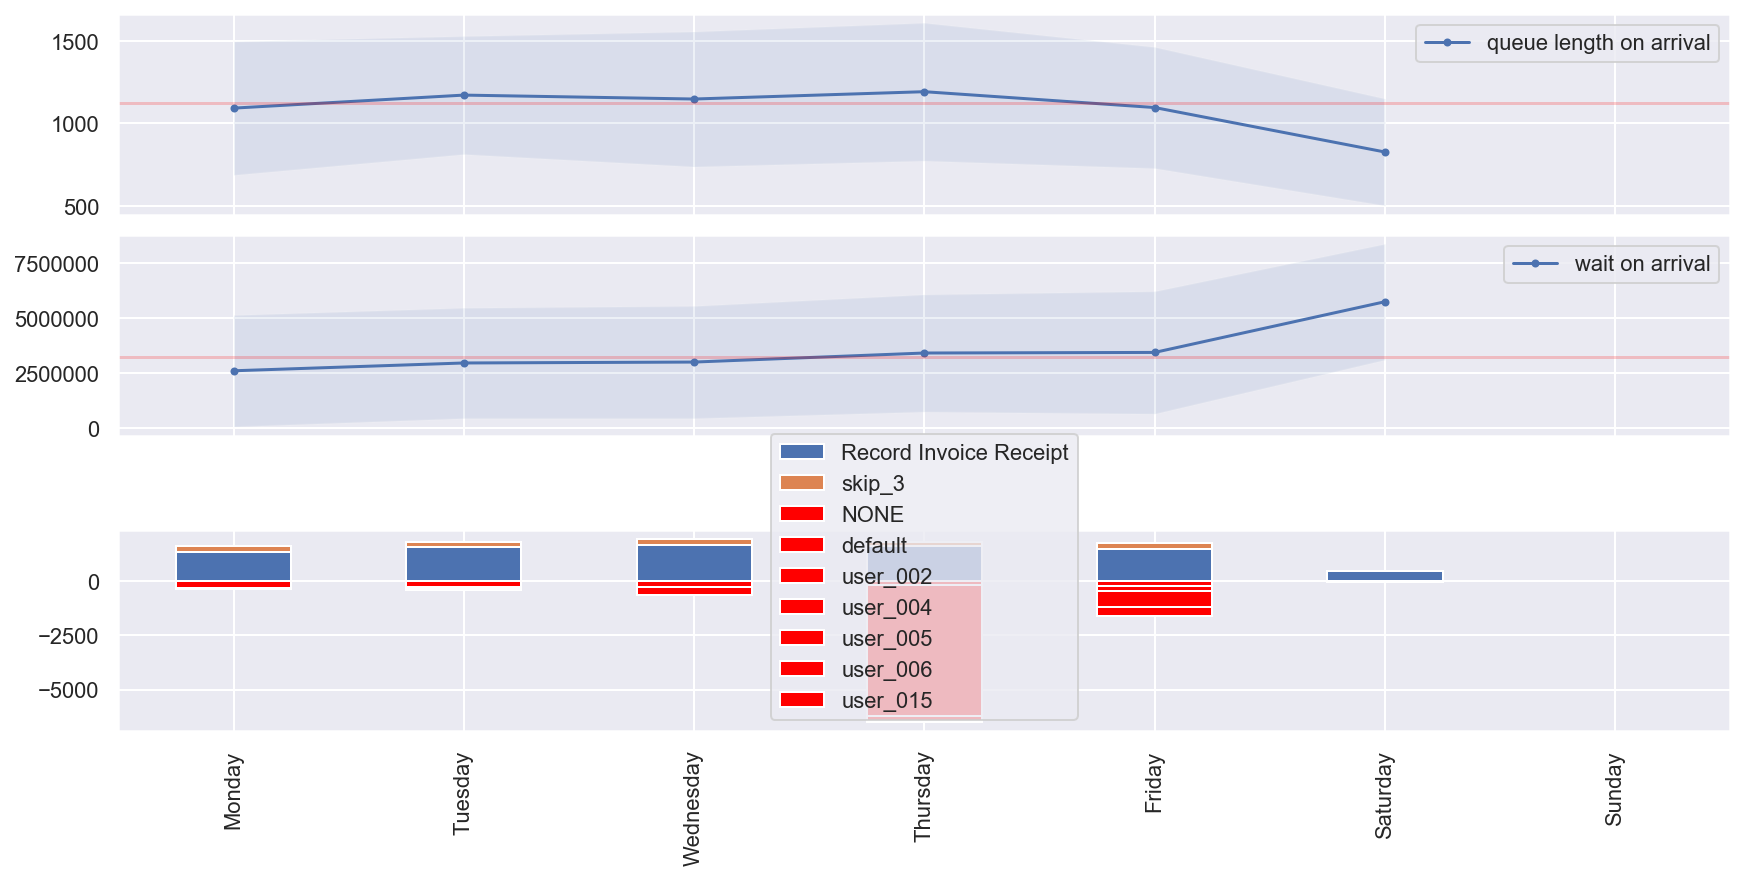

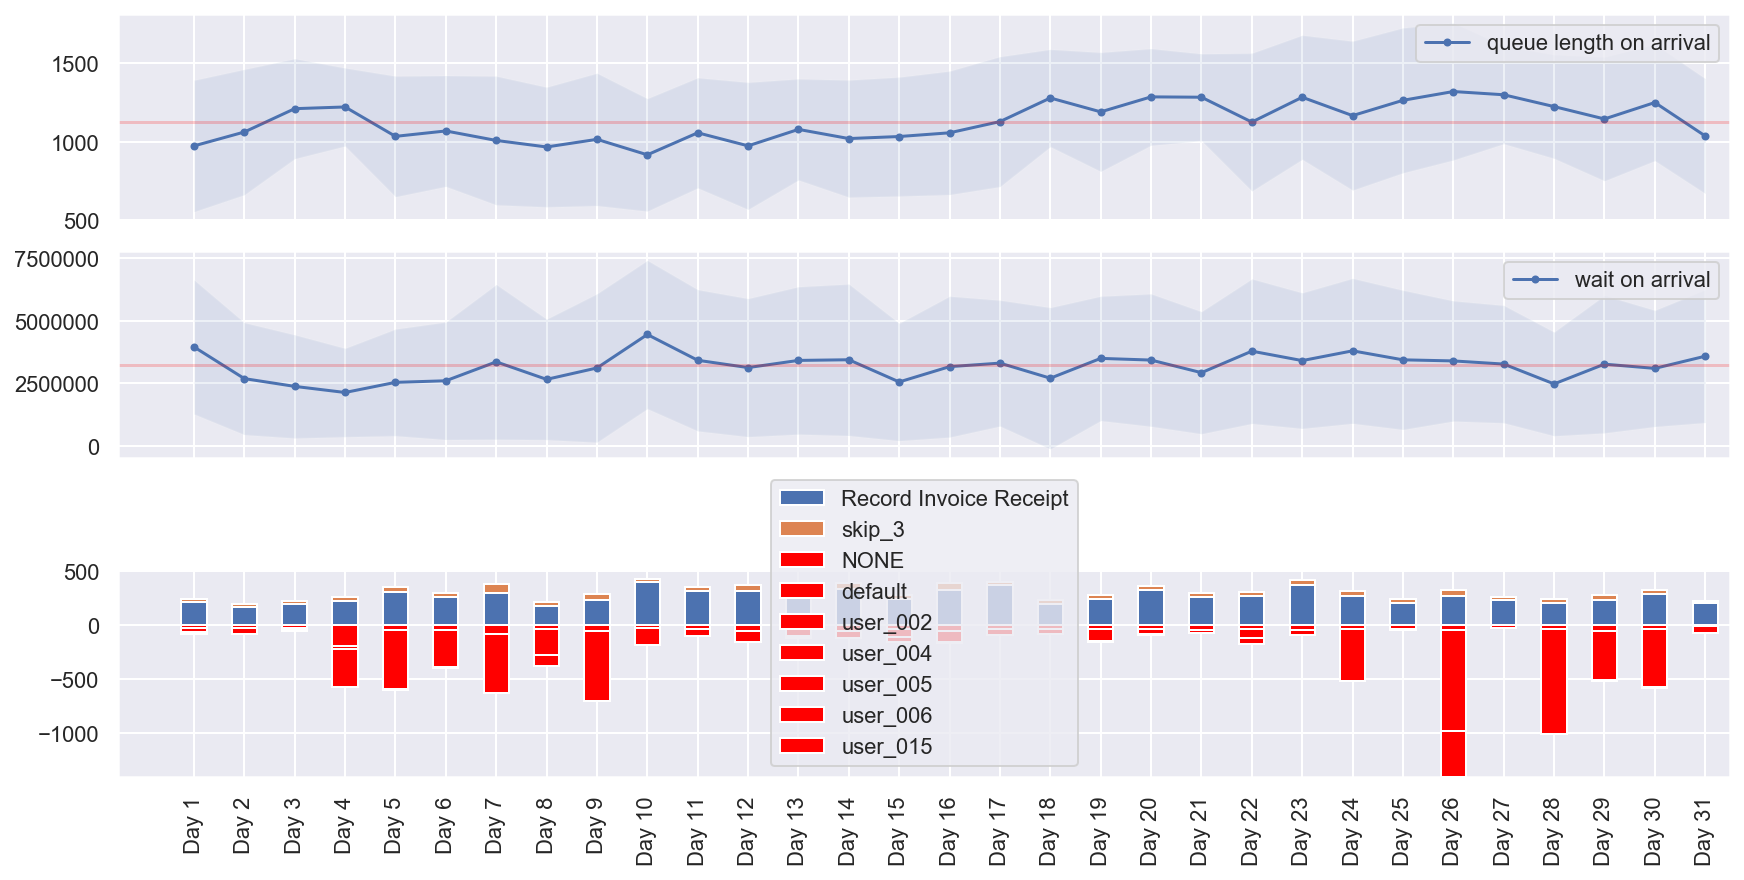

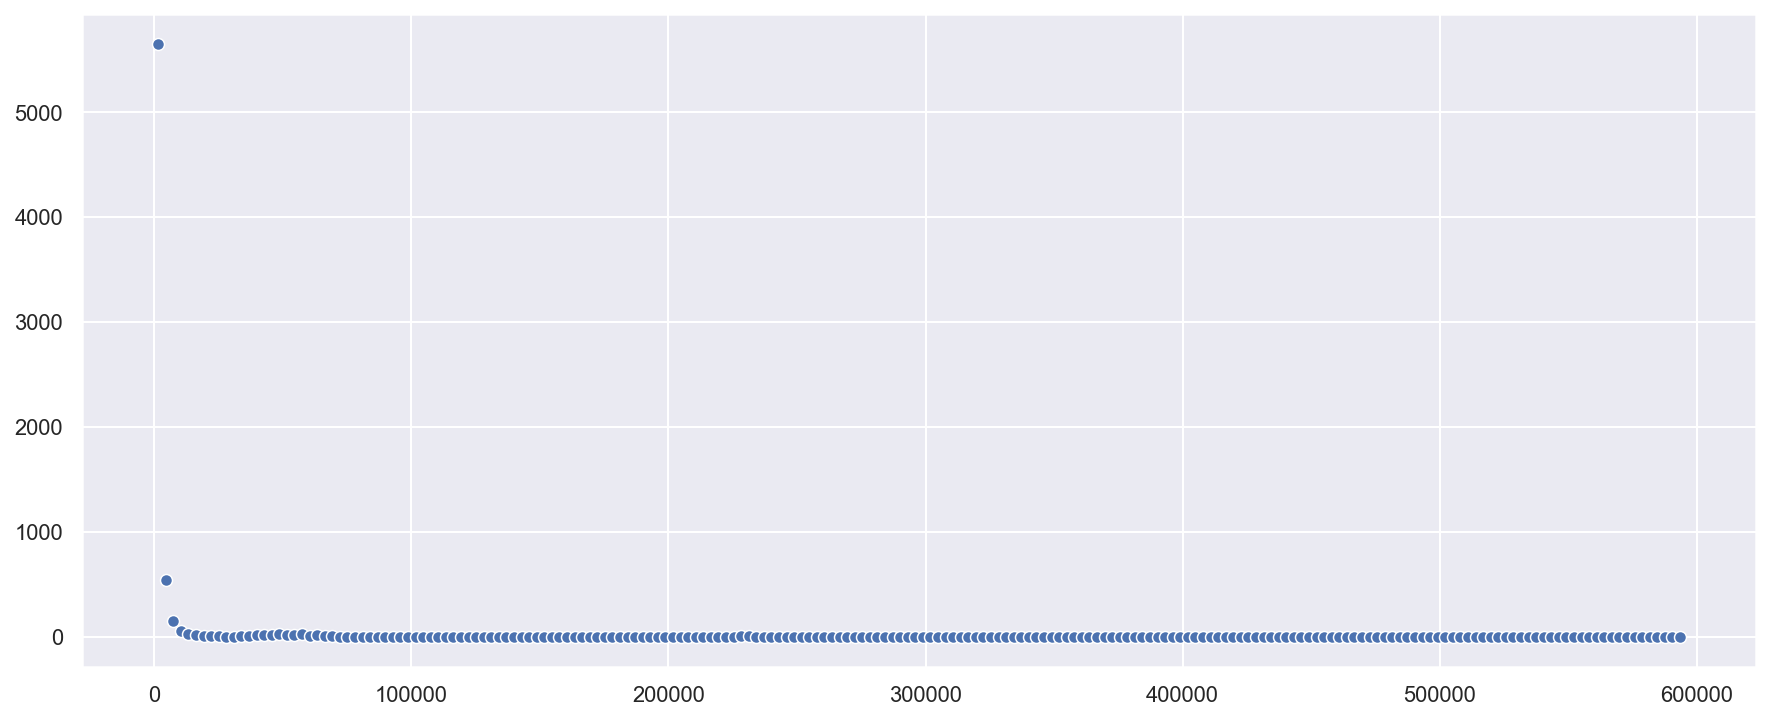

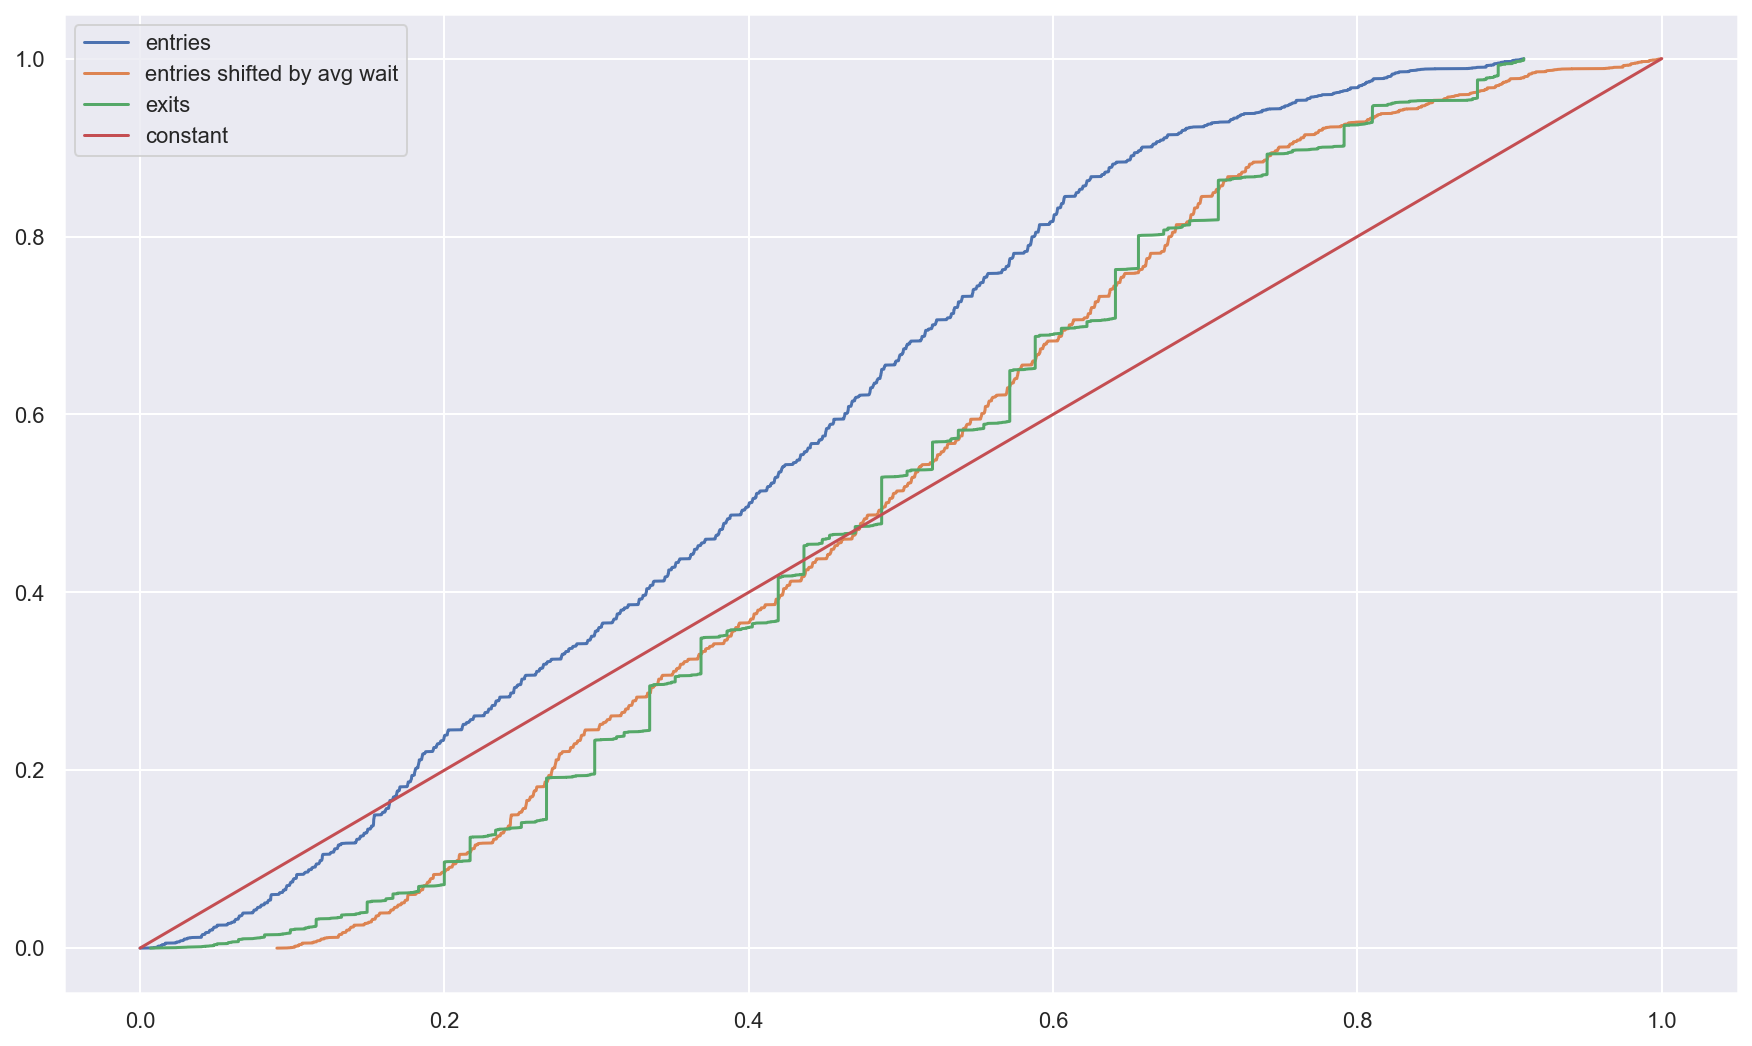

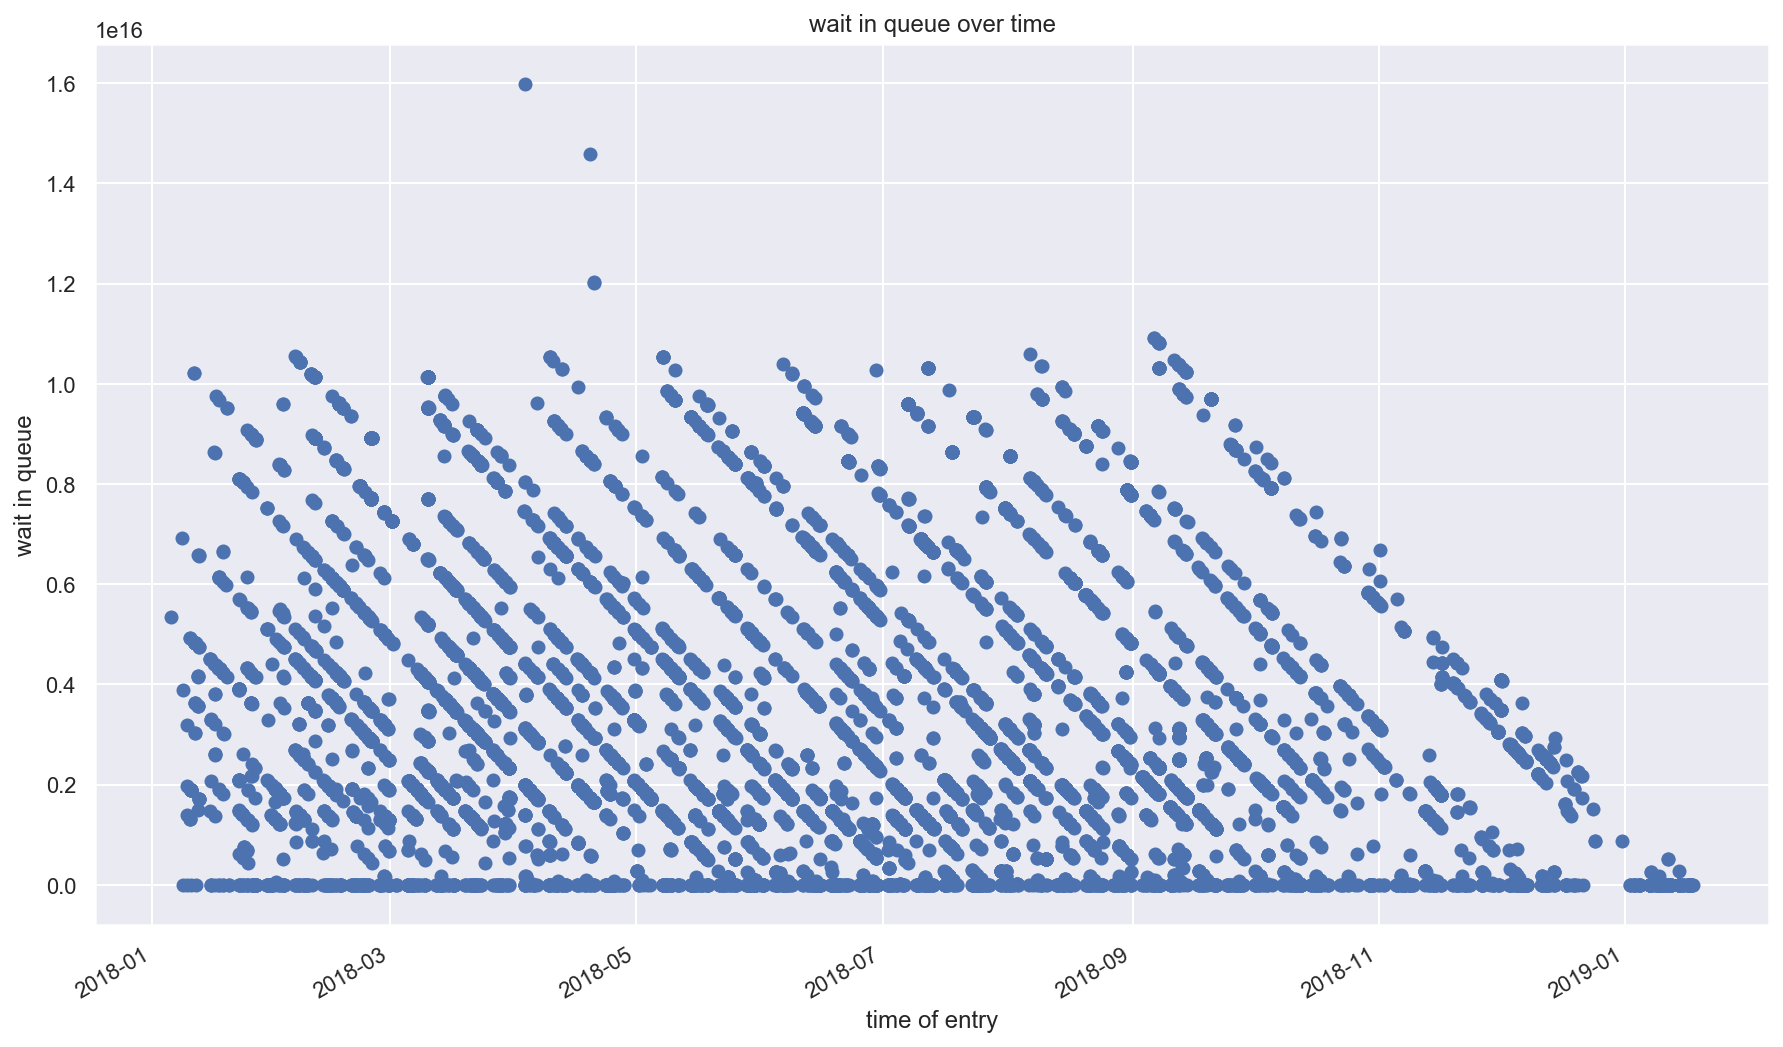

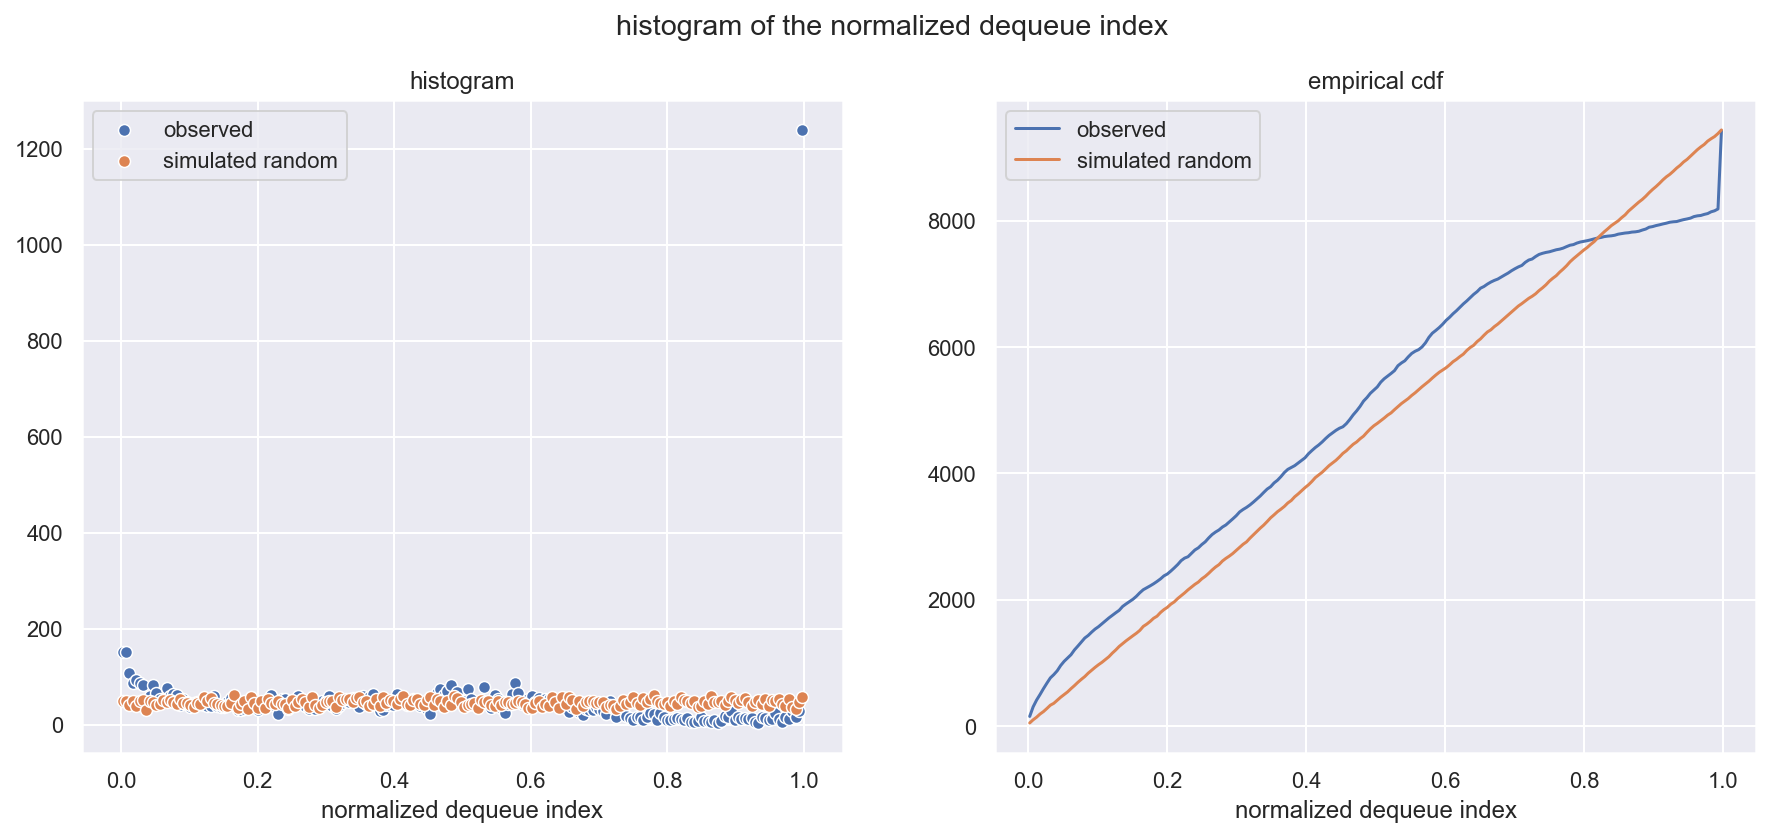

In [10]:
vis_queue(q)

In [11]:
classify_qr(q)

['random like', 'high capacity']

In [12]:
classify_ias(q)

C:\Users\Daniel\PycharmProjects\pm\queue_stats.py:38: UserWarning: p-value floored: true value smaller than 0.001
  test_1 = scipy.stats.anderson_ksamp([ias.entry_ia, ias.exit_ia]).significance_level <= 0.001


['possible batching',
 'statistical difference between entry and exit ias',
 'entry ias are bursty',
 'exit ias are bursty']

In [13]:
classify_df(q)

C:\Users\Daniel\PycharmProjects\pm\util.py:121: UserWarning: p-value floored: true value smaller than 0.001
  return scipy.stats.anderson_ksamp(groups).significance_level <= 0.001, lin_diff


['wait not correlated with queue length',
 'case duration is correlated with wait',
 "statistical difference between queue sources ('Record Invoice Receipt', 'skip_3')",
 (array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16], dtype=int64),
  array([0, 1, 2, 3, 4], dtype=int64),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        dtype=int64)),
 (array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 22], dtype=int64),
  array([3, 4], dtype=int64),
  array([ 4,  5,  6,  7,  8,  9, 10, 15, 16, 19, 22, 24, 26, 28, 29, 30],
        dtype=int64)),
 [user_002, default, user_005, NONE]
 Categories (7, object): [NONE, default, user_002, user_004, user_005, user_006, user_015]]

In [14]:
df = q.get_data()

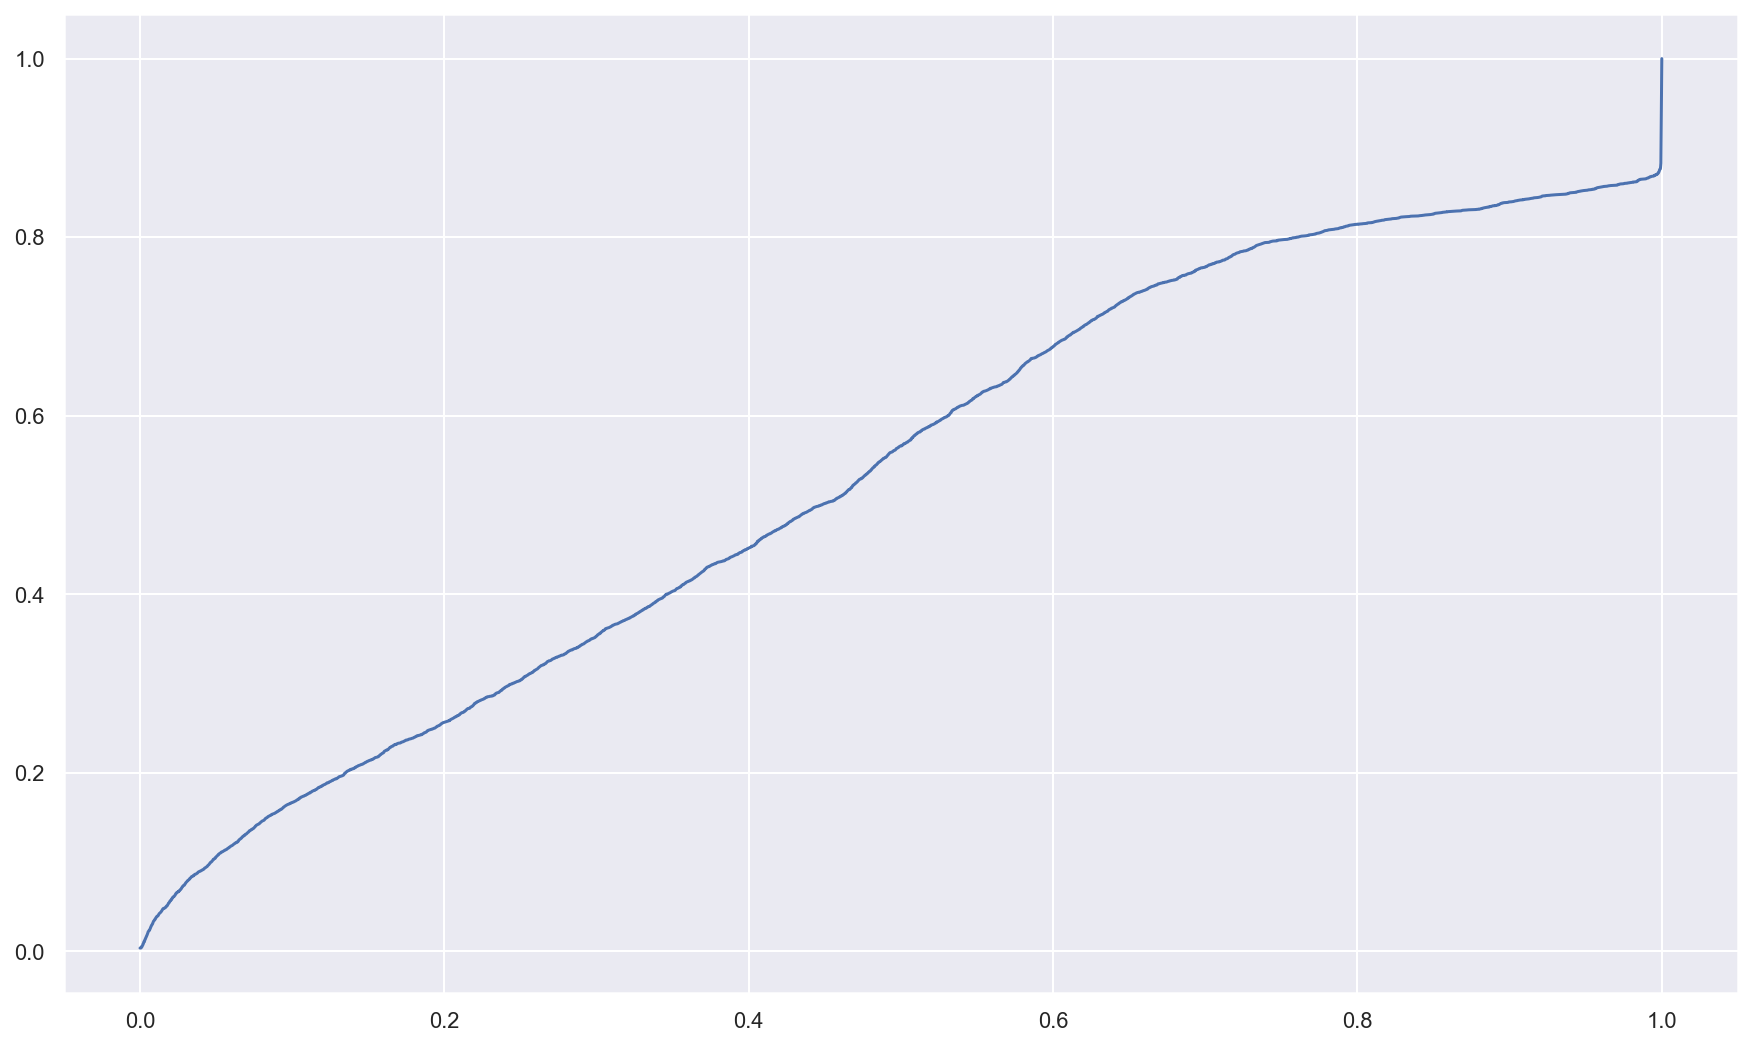

In [15]:
viz.my_ecdf(df['continuous dequeue index'])

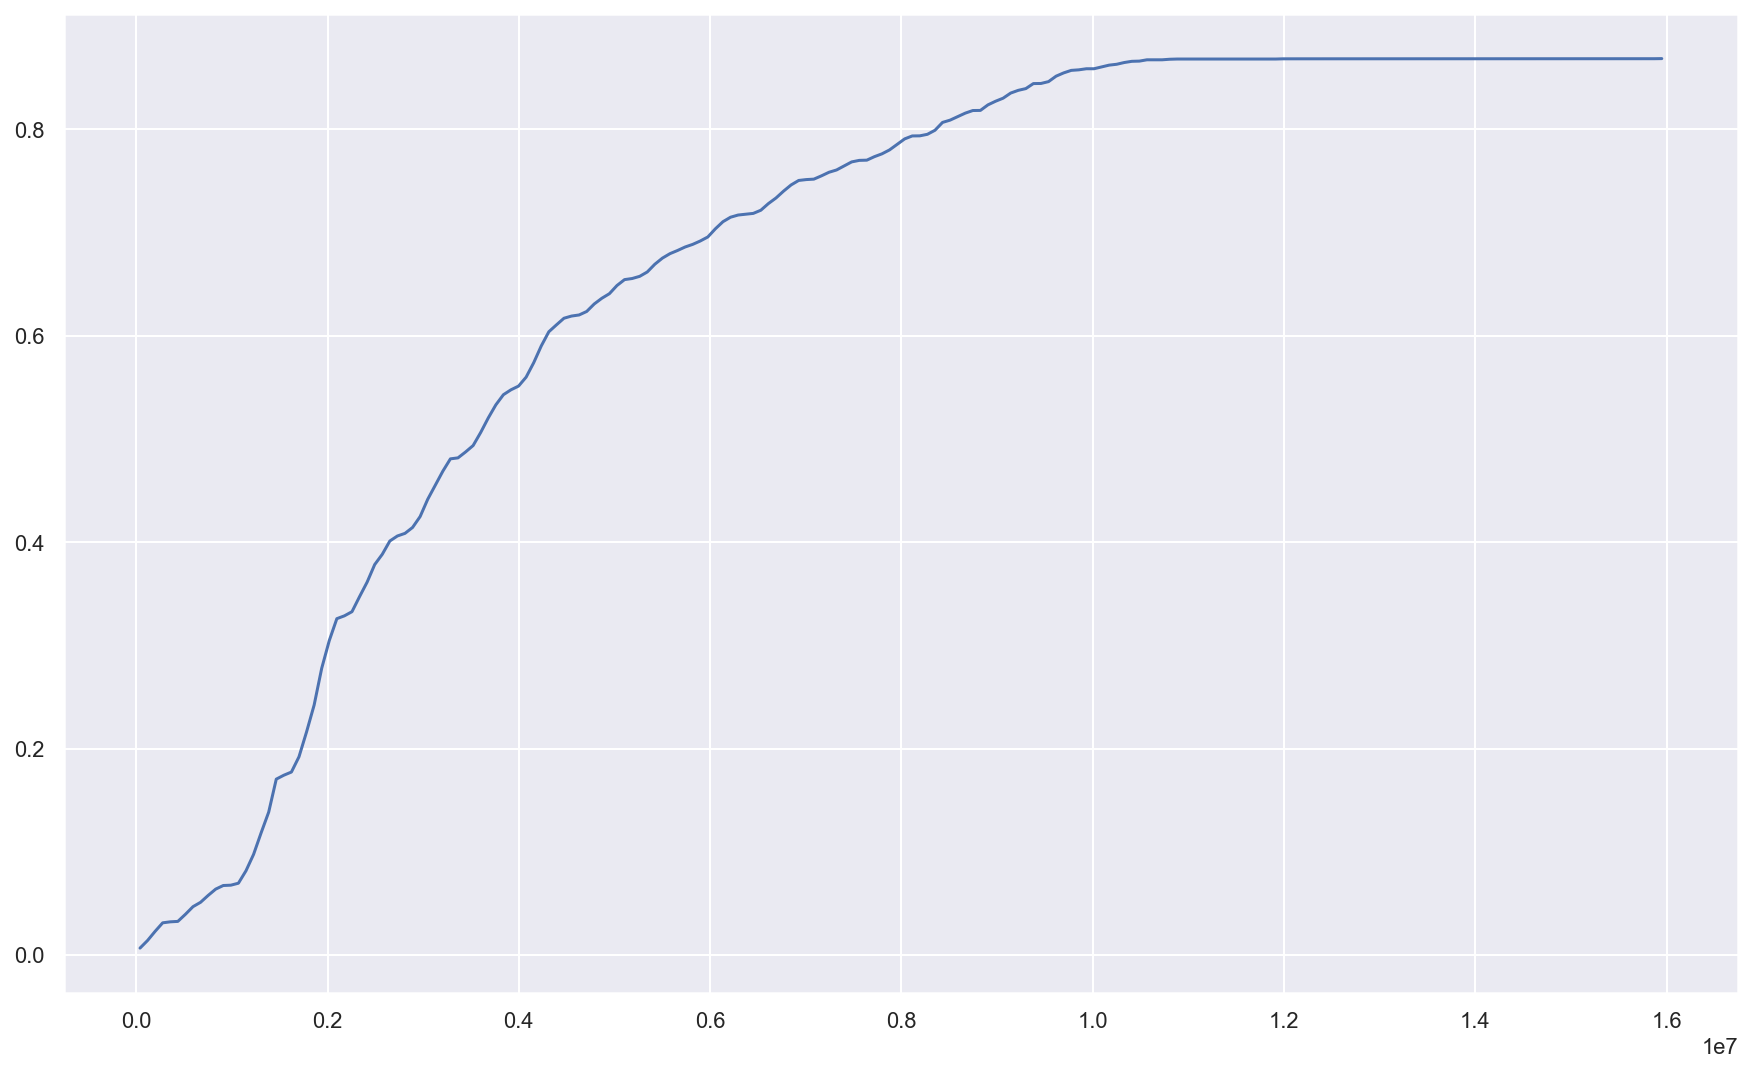

In [16]:
viz.my_cont_ecdf(df['wait'])

In [17]:
sample = util.sample_empirical(df['wait'], 10000)

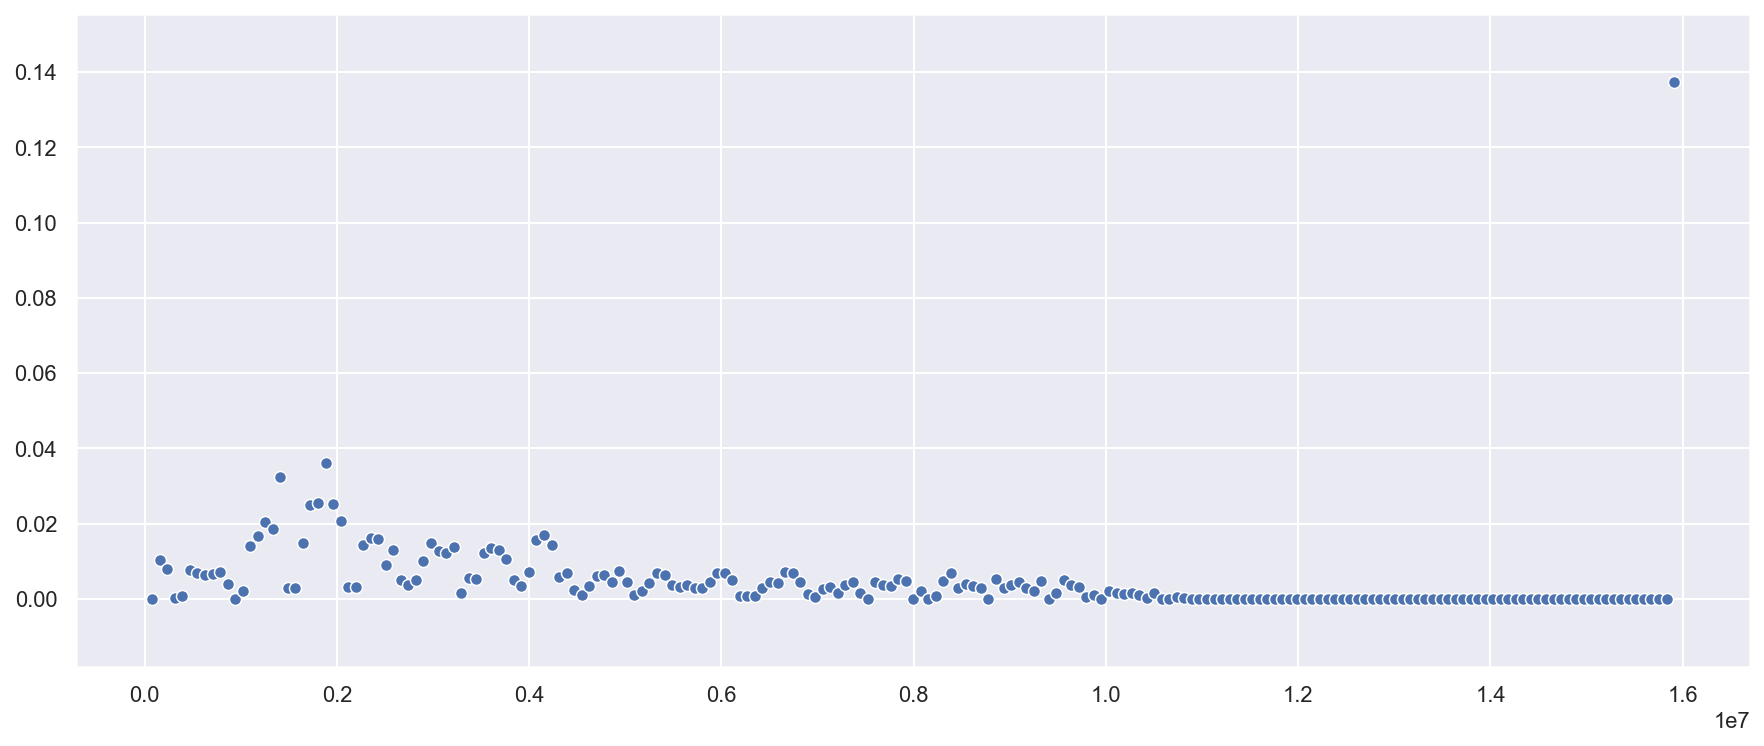

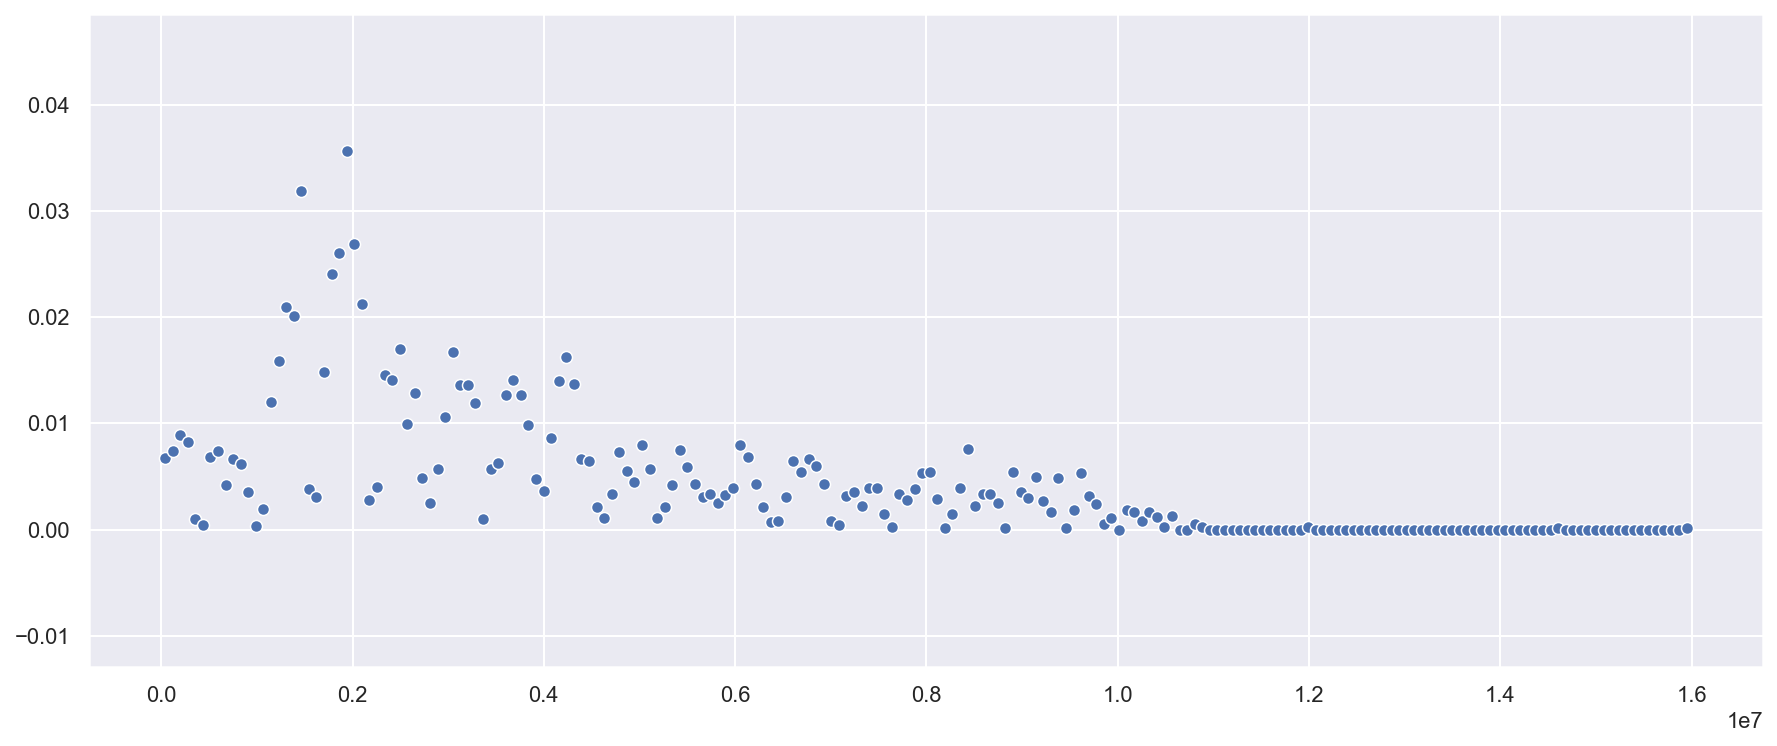

In [18]:
viz.my_hist(pd.Series(sample), normalized=True)
viz.my_hist(df['wait'], normalized=True)